# Simple Linear Regression

## Theory

A simple linear regression quantifies the relationship nature between two variables, which we will call X (independent variable) and y (dependent variable).
It estimates how much y will change when X changes, and with it we can predict the y value given an X value using a linear relationship that will be described by the following expression:

\begin{equation}
y = b_0 + b_1X
\end{equation}

b<sub>1</sub> being called the coefficient and b<sub>0</sub> the constant.
The constant is where the line crosses the y axes and the coefficient is the slope of the line.

The simple linear regression, given some amount of data, finds the best fitting line to predict y.
<b>but what is "the best fitting line"? and how to find it?</b>

given a line, for a number in X, we have the y<sub>i</sub>(that is the actual value that corresponds to x), ŷ<sub>i</sub>(that is the predicted value - where the line is in y for this point in X) and the difference between the observed (y) and the model (ŷ).
To get the best fitting line we have to get the sum of the square of all these differences (that is called residual sum of squares)

\begin{equation}
RSS = \sum_{i=1}^n{(y_i-\hat{y}_i)^2} = \sum_{i=1}^n({y_i-\hat{b}_0-\hat{b}_1X})^2
\end{equation}

then find the line where you get the minimum sum, calculating $\hat{b}_0$ and $\hat{b}_1$ by using:

\begin{equation}
\hat{b}_1 = \frac{\sum_{i=1}^n{(y_i-\bar{y})(X_i-\bar{X})}}{\sum_{i=1}^n{(X_i-\bar{X})^2}}
\end{equation}

and,

\begin{equation}
\hat{b}_0 = \bar{y}-\hat{b}_1\bar{X}
\end{equation}

therefore

\begin{equation}
RSS = \sum_{i=1}^n\left({y_i-\bar{y}-\left(\frac{\sum_{i=1}^n{(y_i-\bar{y})(X_i-\bar{X})}}{\sum_{i=1}^n{(X_i-\bar{X})^2}}\right)\bar{X}-\left(\frac{\sum_{i=1}^n{(y_i-\bar{y})(X_i-\bar{X})}}{\sum_{i=1}^n{(X_i-\bar{X})^2}}\right)X}\right)^2
\end{equation}

## Code
The math behind what we are going to do may look a little scary, but I considere the code much simpler than it

### Data Preprocessing
First of all we need to do some data preprocessing, it will be much simpler than last time though.
Now we just want to import the csv and separate it into training and test set, since it has no missing data or categorical values and just one column of independet variables.
###### to see more explanation about Data Preprocessing look into the Data Preprocessing session

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

and let's take a look into our dataset

In [2]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Creating the model
- At first we have to take a look into our dataset, and doing that we can observe some type of linear relationship between Years of Experience and Salary. So we know that we want to use a Linear Regression, and since we have just one X and one y we will use a Simple Linear Regression
- For doing that we will use the fit method of the Linear Regression class from the sklearn.linear_model library, this method will use the training set to determine the coefficient and constant value that we will use later 

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Now let's take a look into te constant and the coefficient of this model printing the coef_ and intercept_ variables

In [5]:
coefficient = regressor.coef_
constant = regressor.intercept_
print('coefficient: ', coefficient)
print('constant: ', constant)

coefficient:  [9660.13530879]
constant:  24845.1832338045


so we have the equation bellow

In [6]:
print(f'y = {constant} + {coefficient[0]}X')

y = 24845.1832338045 + 9660.135308791296X


### Making the prediction
- Now the only thing we have to do is to use the predict method and give the X_test array as a parameter, and the prediction is done

In [7]:
y_test_prediction = regressor.predict(X_test)

### Visualizing the Data
- to see what is going on we will use matplotlib to plot the model created by the linear regression, using training set, and the result we have got using the model to predict the information in the test set

In [8]:
import matplotlib.pyplot as plt

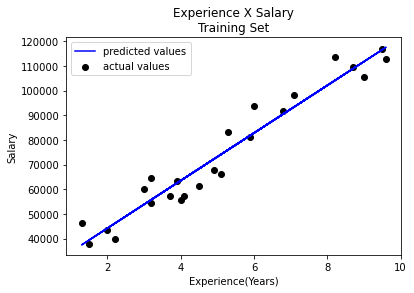

In [9]:
y_train_prediction = regressor.predict(X_train)
plt.scatter(X_train, y_train, color='black', label='actual values')
plt.plot(X_train, y_train_prediction, color='blue', label='predicted values')
plt.ylabel('Salary')
plt.xlabel('Experience(Years)')
plt.legend()
plt.title('Experience X Salary\nTraining Set')
plt.show()


we can see that it is pretty accurate, and it shows that we probably choose a good predictor. But it could be overfitting, so let's look into the results using the test set

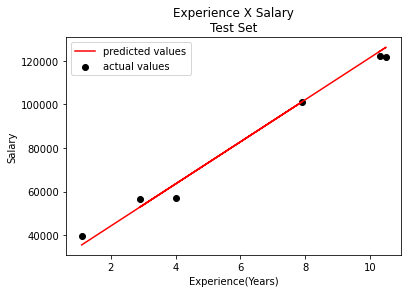

In [10]:
plt.scatter(X_test, y_test, color='black', label='actual values')
plt.plot(X_test, y_test_prediction, color='red', label='predicted values')
plt.ylabel('Salary')
plt.xlabel('Experience(Years)')
plt.legend()
plt.title('Experience X Salary\nTest Set')
plt.show()

It looks like that our model did a good job.

Now let's use the model in one single value to see how much would be the salary of some one with 15 years of experience(this value has to be inside a 2D array)

In [11]:
year_of_experience = 15
salary = regressor.predict([[year_of_experience]])
print(f'the salary of some one with {year_of_experience} years of experience should be somewhere near {salary[0]}')

the salary of some one with 15 years of experience should be somewhere near 169747.21286567394
